# Point Cloud Processing

A point cloud is a set of points that represents the scene in the real world or objects in space. It is a discrete representation of geometric objects and scenes. More formally, a point cloud PCD is a set of n points where each point Pi is represented by its 3D coordinates :

<p align="center">
<img src="figs/1_2C-14BlBZSqz_nF6BWllEw.webp">
</p>

Note that some other features can be added to describe point clouds such as RGB colors, normals, etc. RGB colors, for example, can be added to provide color information.

## 1. Point cloud generation

Point clouds are typically generated using 3D scanners (laser scanners, time-of-flight scanners, and structured-light scanners) or from computer-aided design (CAD) models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### 1.1 Random point cloud

The easiest way is to create a point cloud randomly. Note that we don’t usually create random points to be processed, except to create noise for GANs (Generative Adversarial Networks) for example.

Generally, point clouds are represented by (n × 3) arrays where n is the number of points. Let’s create a point cloud with 5 random points:

In [2]:
number_points = 5
pcd = np.random.rand(number_points, 3)  # uniform distribution over [0, 1)
print(pcd)

[[0.73631347 0.07768413 0.97978695]
 [0.22048777 0.2405233  0.9783004 ]
 [0.41526725 0.55019826 0.96918886]
 [0.0028601  0.97523056 0.62528481]
 [0.67779254 0.87706603 0.13887833]]


We can just print these points but it is not efficient especially if the number of points is large like in most applications. A better way is to display them in 3D space. Let’s visualize it using Matplotlib library:

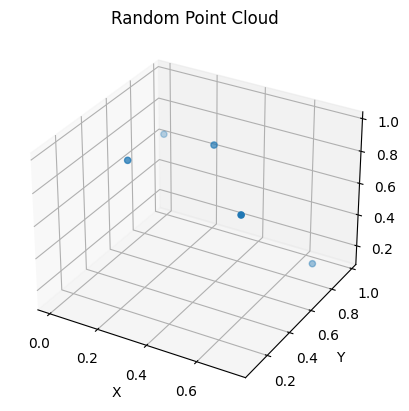

In [3]:
# Create Figure:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd[:, 0], pcd[:, 1], pcd[:, 2])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Random Point Cloud")
# display:
plt.show()

### 1.2 Sampled point cloud

Sometimes processing 3D models directly takes time and memory. Therefore, sampling point clouds from their 3D surfaces is a potential solution. Let’s import the bunny model from the Open3D dataset:

In [4]:
mesh = o3d.io.read_triangle_mesh("figs/bunny.ply")

Next, display the 3D model to see how it looks like. You can move the mouse to view from different view points.

In [5]:
# Visualize:
mesh.compute_vertex_normals() # compute normals for vertices or faces
o3d.visualization.draw_geometries([mesh])

To sample a point cloud, several methods exist. In this example, we sample 1000 points uniformly from the imported mesh and visualize it:

In [6]:
# Sample 1000 points:
pcd = mesh.sample_points_uniformly(number_of_points=1000)

# visualize:
o3d.visualization.draw_geometries([pcd])

We can save the created point cloud in .ply format as follows:

In [7]:
# Save into ply file:
o3d.io.write_point_cloud("figs/bunny_pcd.ply", pcd)

True

### 1.3 Point clouds from RGB-D data

RGB-D data is collected using RGB-D sensors (such as Microsoft Kinect) which simultaneously provide an RGB image and a depth image. RGB-D sensors are involved in many applications such as indoor navigation, obstacle avoidance, etc. As the RGB image provides the pixel color, each pixel of the depth image indicates its distance from the camera.

Open3D provides a set of functions for RGB-D image processing. To create point clouds from RGB-D data using Open3D functions just import the two images, create an RGB-D image object and finally compute the point cloud as follows:

In [4]:
# read the color and the depth image:
color_raw = o3d.io.read_image("./figs/rgb.jpg")
depth_raw = o3d.io.read_image("./figs/depth.png")

# create an rgbd image object:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw, convert_rgb_to_intensity=False)
# use the rgbd image to create point cloud:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

# visualize:
o3d.visualization.draw_geometries([pcd])

## 2. Open3D and NumPy

Sometimes you will need to switch between Open3D and NumPy representations. For example, let’s say we want to convert a NumPy point cloud to an Open3D.PointCloud object for visualization, and visualize the 3D model of bunny using Matplotlib.

### 2.1 From NumPy to Open3D

In this example, we create 2000 random points using NumPy.random.rand() function that creates random samples from a uniform distribution over [0,1). Then we create an Open3D.PointCloud object and set its Open3D.PointCloud.points feature to the random points using Open3D.utility.Vector3dVector() function.

In [5]:
# Create numpy pointcloud:
number_points = 2000
pcd_np = np.random.rand(number_points, 3)

# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np)  # set pcd_np as the point cloud points

# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

### 2.2 From Open3D to NumPy

Here, we first read the point cloud from a .ply file using Open3D.io.read_point_cloud() function that returns an Open3D.PointCloud object. After that, we only have to transform the Open3D.PointCloud.points feature that represents the points to a NumPy array using NumPy.asarray() function. Finally, we display the obtained array as we did above.

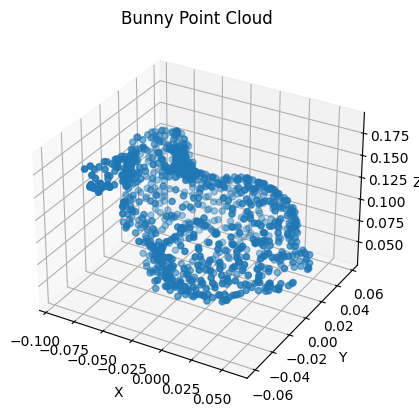

In [6]:
# Read the bunny point cloud file:
pcd_o3d = o3d.io.read_point_cloud("./figs/bunny_pcd.ply")

# Convert the open3d object to numpy:
pcd_np = np.asarray(pcd_o3d.points)

# Display using matplotlib:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bunny Point Cloud")
# display:
plt.show()

## References

* [Introduction to Point Cloud Processing](https://betterprogramming.pub/introduction-to-point-cloud-processing-dbda9b167534)